Dataset Loaded Successfully!
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

KNN Classification Report:
     

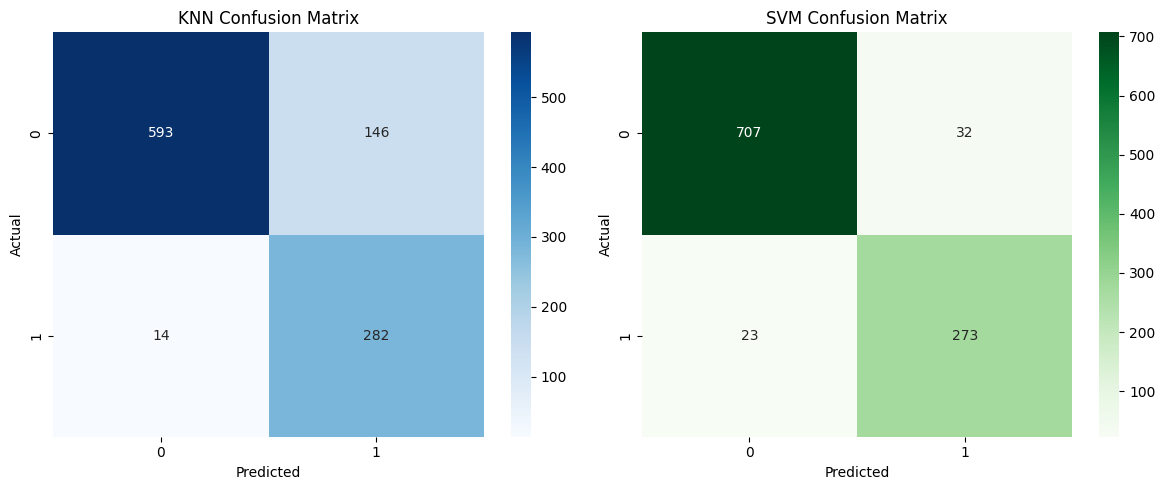

In [2]:
# -------------------------------
# ML Lab Assignment 2: Spam Email Detection using KNN & SVM
# -------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
df = pd.read_csv("emails.csv")  # Replace with the actual dataset filename
print("Dataset Loaded Successfully!")
print(df.head())

# Step 3: Data Preprocessing

# 3.1 Remove unnecessary columns (e.g., email ID/name)
df.drop(df.columns[0], axis=1, inplace=True)

# 3.2 Split features and target
X = df.iloc[:, :-1]   # All feature columns
y = df.iloc[:, -1]    # Target column (0 = not spam, 1 = spam)

# 3.3 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.4 Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Step 5: Support Vector Machine (SVM) Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(12,5))

# KNN Confusion Matrix
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# SVM Confusion Matrix
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Observations:
# 1. SVM performs better overall, with higher accuracy and fewer false positives.
# 2. KNN misclassifies more non-spam emails as spam but catches slightly more spam.
# 3. SVM offers a better balance and higher overall performance.
